**Xception**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import resnet
from keras.layers import Flatten , Dense , Activation
from keras import optimizers , Sequential
from keras.optimizers import Adam
from keras import models , layers
from keras.layers import Input
from keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
train_path='/content/gdrive/MyDrive/Dataset/train'
val_path='/content/gdrive/MyDrive/Dataset/val'
test_data='/content/gdrive/MyDrive/Dataset/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
val_datagen = ImageDataGenerator(rescale=1./255)
testdata_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=64,shuffle=True,class_mode='sparse')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=64,shuffle=False,class_mode='sparse')
test_generator = testdata_datagen.flow_from_directory(test_data,target_size=(224,224),batch_size=64,shuffle=False,class_mode='sparse')

Found 994 images belonging to 4 classes.
Found 343 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


In [ ]:
xception_model =tf.keras.applications.Xception(pooling='max',
                    weights='imagenet',
                    include_top=False,
                    input_shape=(224,224,3))
for layers in xception_model.layers:
            layers.trainable=False

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Input,BatchNormalization , Dropout

In [ ]:
model = Sequential()
model.add(xception_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                        

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100)

Epoch 1/100
16/16 [==============================] - 270s 16s/step - loss: 1.2960 - accuracy: 0.4376 - val_loss: 0.9615 - val_accuracy: 0.5918
Epoch 2/100
16/16 [==============================] - 17s 1s/step - loss: 0.7736 - accuracy: 0.6952 - val_loss: 0.7560 - val_accuracy: 0.7026
Epoch 3/100
16/16 [==============================] - 18s 1s/step - loss: 0.6000 - accuracy: 0.7767 - val_loss: 0.6437 - val_accuracy: 0.7697
Epoch 4/100
16/16 [==============================] - 17s 1s/step - loss: 0.5409 - accuracy: 0.8008 - val_loss: 0.5766 - val_accuracy: 0.8076
Epoch 5/100
16/16 [==============================] - 18s 1s/step - loss: 0.4712 - accuracy: 0.8390 - val_loss: 0.5237 - val_accuracy: 0.8105
Epoch 6/100
16/16 [==============================] - 17s 1s/step - loss: 0.4176 - accuracy: 0.8632 - val_loss: 0.4829 - val_accuracy: 0.8309
Epoch 7/100
16/16 [==============================] - 20s 1s/step - loss: 0.3533 - accuracy: 0.8823 - val_loss: 0.4435 - val_accuracy: 0.8455
Epoch 8/100

In [ ]:
model.evaluate(test_generator)

3/3 [==============================] - 29s 14s/step - loss: 0.2713 - accuracy: 0.9402


[0.2712867558002472, 0.9402173757553101]

In [ ]:
Y_pred = model.predict(test_generator)

3/3 [==============================] - 1s 257ms/step


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_true = test_generator.classes

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
cm = confusion_matrix(y_true, y_pred)

In [ ]:
import pandas as pd
cm_df = pd.DataFrame(cm,
                     index = ['CP','ME','MP','NL'],
                     columns = ['CP','ME','MP','NL'])

<ipython-input-18-5b2de8265392>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


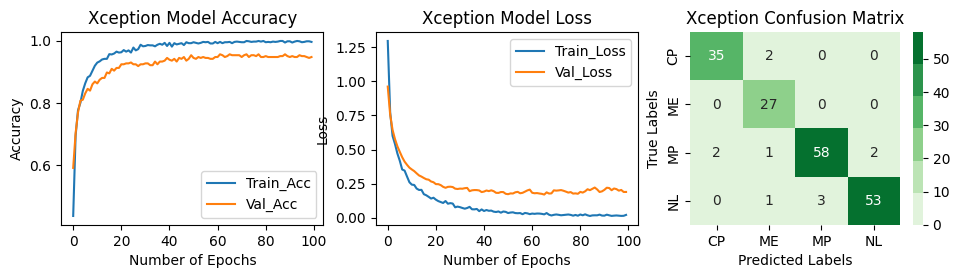

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.subplots(figsize=(11.5,2.5))
plt.subplot(1,3,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Acc', 'Val_Acc'], loc='lower right')

plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper right')

plt.subplot(1,3,3)
#plt.figure(figsize=(3.5,2.5))
colormap = sns.color_palette("Greens")
sns.heatmap(cm_df,cmap=colormap, annot=True)
plt.title('Xception Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.87      1.00      0.93        27
           2       0.95      0.92      0.94        63
           3       0.96      0.93      0.95        57

    accuracy                           0.94       184
   macro avg       0.93      0.95      0.94       184
weighted avg       0.94      0.94      0.94       184

